In [90]:
#Imports
from scripts import bookdatafunctions as bdf
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

In [ ]:
#Constants
CONLLU_FOLDER = "Conllus"
ISBN2AGE_PATH = "ISBN_MAPS/ISBN2AGE.xlsx"

In [92]:
#Load corpus and map ages
corpus_ages_mapped = bdf.mapGroup2Age(bdf.cleanLemmas(bdf.initBooksFromConllus(CONLLU_FOLDER)), ISBN2AGE_PATH)

/home/tenojo/Codings/FCBLex-pipeline/scripts/bookdatafunctions.py:472: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_2 = filtered[m_2]
/home/tenojo/Codings/FCBLex-pipeline/scripts/bookdatafunctions.py:472: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_2 = filtered[m_2]
/home/tenojo/Codings/FCBLex-pipeline/scripts/bookdatafunctions.py:472: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_2 = filtered[m_2]
/home/tenojo/Codings/FCBLex-pipeline/scripts/bookdatafunctions.py:472: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_2 = filtered[m_2]
/home/tenojo/Codings/FCBLex-pipeline/scripts/bookdatafunctions.py:472: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_2 = filtered[m_2]
/home/tenojo/Codings/FCBLex-pipeline/scripts/bookdatafunctions.py:472: UserWarning: Boolean Series key will be reindexed

In [93]:
#Divide sub-corpora
ages = sorted(bdf.getAvailableAges(corpus_ages_mapped))
sub_corpora = [bdf.getDistinctSubCorp(corpus_ages_mapped, x) for x in ages]

In [94]:
#Grab stats necessary for Zipf-calculations
word_amounts_total = bdf.getTokenAmounts(corpus_ages_mapped)
word_amounts_sub = [bdf.getTokenAmounts(x) for x in sub_corpora]

l = bdf.getL(word_amounts_total)
l_sub = [bdf.getL(x) for x in word_amounts_sub]

Lemma Zipf-values

In [95]:
lemma_freqs = bdf.getLemmaFrequencies(corpus_ages_mapped)
lemma_freqs_sub = [bdf.getLemmaFrequencies(x) for x in sub_corpora]

f_lemma = bdf.combineFrequencies(lemma_freqs)
f_lemma_sub = [bdf.combineFrequencies(x) for x in lemma_freqs_sub]

lemma_zipfs = bdf.getZipfValues(l, f_lemma)
lemma_zipfs_sub = [bdf.getZipfValues(l_sub[i], f_lemma_sub[i]) for i in range(len(sub_corpora))]

In [101]:
print(lemma_zipfs)

0           3.693781
0#napaa     2.790691
0,25-0,5    3.012540
0,5-1       3.267813
0,5-2       2.790691
              ...   
⑨           2.614600
よ           2.614600
ㅚ           2.614600
埃           2.614600
狼           2.614600
Length: 136253, dtype: float64


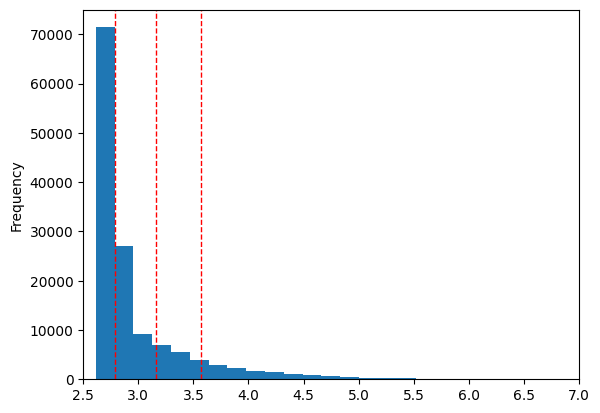

In [96]:
ax = lemma_zipfs.plot.hist(bins=30)
ax.set_ylim(0,75000)
ax.set_xlim(2.5,7)
per_60 = np.percentile(lemma_zipfs.values, 60)
per_80 = np.percentile(lemma_zipfs.values, 80)
per_90 = np.percentile(lemma_zipfs.values, 90)
ax.axvline(per_60, color='r', linestyle='dashed', linewidth=1, label='60th Percentile')
ax.axvline(per_80, color='r', linestyle='dashed', linewidth=1, label='80th Percentile')
ax.axvline(per_90, color='r', linestyle='dashed', linewidth=1, label='90th Percentile')

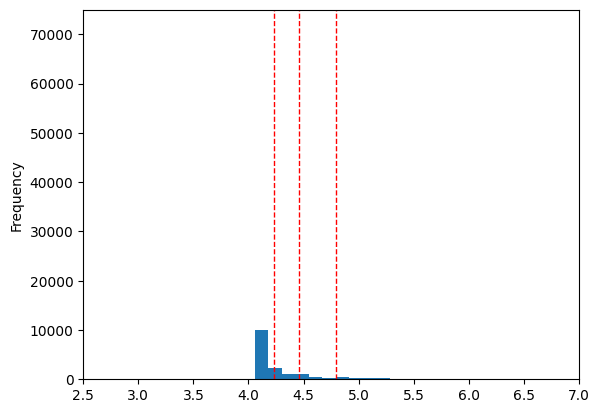

In [97]:
i=0
ax1 = lemma_zipfs_sub[i].plot.hist(bins=30)
ax1.set_ylim(0,75000)
ax1.set_xlim(2.5,7)
per_60 = np.percentile(lemma_zipfs_sub[i].values, 60)
per_80 = np.percentile(lemma_zipfs_sub[i].values, 80)
per_90 = np.percentile(lemma_zipfs_sub[i].values, 90)
ax1.axvline(per_60, color='r', linestyle='dashed', linewidth=1, label='60th Percentile')
ax1.axvline(per_80, color='r', linestyle='dashed', linewidth=1, label='80th Percentile')
ax1.axvline(per_90, color='r', linestyle='dashed', linewidth=1, label='90th Percentile')

Word-type Zipf-values

In [98]:
word_freqs = bdf.getWordFrequencies(corpus_ages_mapped)
word_freqs_sub = [bdf.getWordFrequencies(x) for x in sub_corpora]

f_word = bdf.combineFrequencies(word_freqs)
f_word_sub = [bdf.combineFrequencies(x) for x in word_freqs_sub]

word_zipfs = bdf.getZipfValues(l, f_word)
word_zipfs_sub = [bdf.getZipfValues(l_sub[i], f_word_sub[i]) for i in range(len(sub_corpora))]

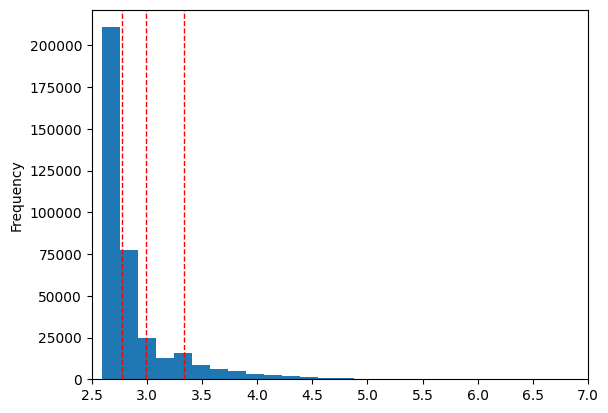

In [100]:
ax = word_zipfs.plot.hist(bins=30)
#ax.set_ylim(0,75000)
ax.set_xlim(2.5,7)
per_60 = np.percentile(word_zipfs.values, 60)
per_80 = np.percentile(word_zipfs.values, 80)
per_90 = np.percentile(word_zipfs.values, 90)
ax.axvline(per_60, color='r', linestyle='dashed', linewidth=1, label='60th Percentile')
ax.axvline(per_80, color='r', linestyle='dashed', linewidth=1, label='80th Percentile')
ax.axvline(per_90, color='r', linestyle='dashed', linewidth=1, label='90th Percentile')